# H1N1 Vaccination Analysis
![vaccine](./images/vaccine.jpg)

# Overview
This project is to study the vaccination rate. Various types of people are taken into the analysis. Some visualizations and tables are included to aid in understanding the progress.

#  Business Problem
A survey was conducted to record if people received the H1N1 vaccine. The survey  consists of more than 30 multiple-choice questions including vaccination status, demographics, knowledge level of vaccine, etc. Health organizations including CDC is interested in raising the h1n1 vaccination rate by reaching out to people without vaccination as much as possible. It was requested to research what categories of people have a lower rate of vaccinated people.

# Data Understanding

The data for this analysis comes from the National 2009 H1N1 Flu Survey (NHFS). The dataset has more than 30 columns where each column represents a question in the survey. Several columns are removed as they are not relevant to H1N1 vaccine information.

In [1]:
# import necessar libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

# Below libraries are located at code folder.
import code.data_preparation as dp # cleaning, creating dummy variables, etc
import code.visualizations as viz # every visualization code

In [2]:
# read data
# predictors
data = pd.read_csv("data/training_set_features.csv", index_col = 0)
# target
vac = pd.read_csv("data/training_set_labels.csv", index_col = 0)

# merge them to align the index
all_data = data.merge(vac['h1n1_vaccine'], left_index=True, right_index=True)

# remove columns related to seasonal flu
all_data.drop(['doctor_recc_seasonal',
               'opinion_seas_vacc_effective',
               'opinion_seas_risk',
               'opinion_seas_sick_from_vacc'], 
              axis = 1,
              inplace=True)

# Data Cleaning
All predictors are categorical. They are either binary or multi-binary. Therefore, no scaling is made.


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  health_insurance

## Missing Values
Below shows all columns with the number of missing values.

In [4]:
all_data.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
h

The majority of variables have missing values. The number of missing values ranges from 10 to 10k. Since they are categorical, the missing values can be assigned to a new value or to one of the existing values. 

The missing values for all columns except three are assigned to a new value/category. The reason is that it is hard to guess what the missing values mean. The missing values could mean "don't know", "not available", or "out of range". For example, one might not know the health insurance status where the number of missing values for the health insurance question is above 10k.

However, the missing values for three questions regarding opinions about H1N1 were easy to guess. Out of 5 scales, respondents can choose from, there is one option for "don't know". The missing values for these questions are assigned to "don't know".

In [5]:
# handling missing data
X = dp.missing(all_data).copy()
y = X.pop('h1n1_vaccine')

In [6]:
# missing value counts after handling missing values
X.isna().sum().sum()

0

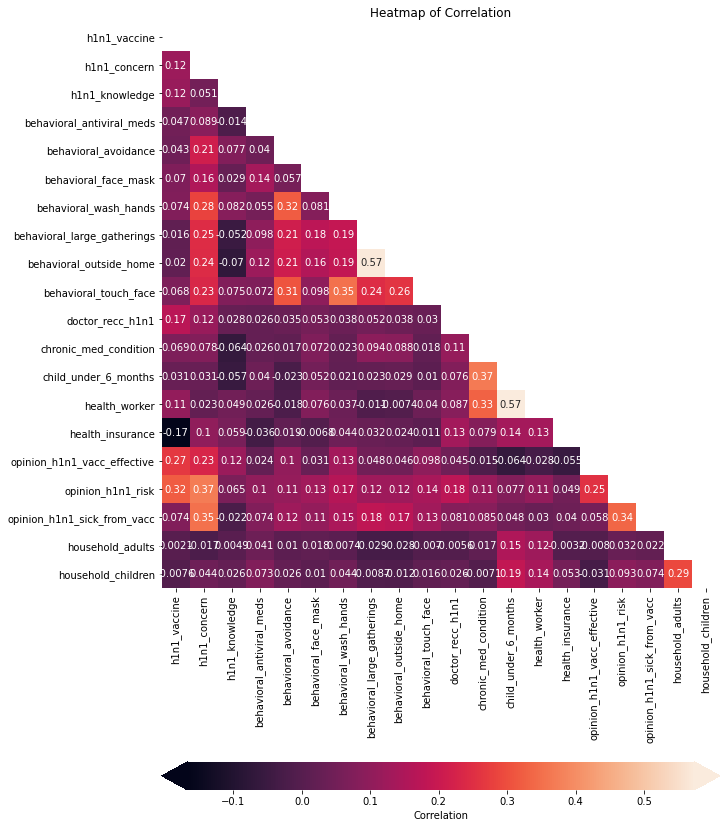

In [7]:
# heat map
viz.heat_map(y, X)

## Dummy Variables
Dummy variables are created for multi-binary columns using pandas.

In [8]:
# creating dummy variables using pandas
for c in X.columns:
    X = dp.dummy(X, c)

In [9]:
X.shape

(26707, 159)

Please refer to **code/DEA_cleaning.ipyng** for detailed steps on handling the missing values and creating dummy variables.

# Analysis
Before the analysis, the data is split into a train set and a test set. The train set size is 75% of the whole data.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

## Baseline Models
Two baseline models are made using methods of decision tree and random forest.

Please refer to **code/DEA_baseline_model_selection.ipyng** for detailed steps on selecting baseline models.

Decision Tree Classifier Model

CV score:     77.57%
X-test score: 78.66%
RMSE:         0.462

X-test score

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      5263
           1       0.50      0.50      0.50      1414

    accuracy                           0.79      6677
   macro avg       0.68      0.68      0.68      6677
weighted avg       0.79      0.79      0.79      6677



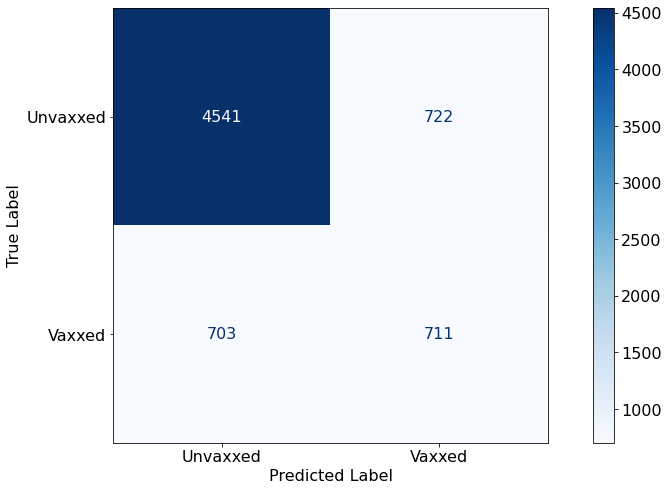

In [11]:
# a simple model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)

print("Decision Tree Classifier Model\n")
dp.scores2(X_train, y_train, X_test, y_test, dtc)
viz.plot_cm(X_train, y_train, X_test, y_test, dtc)

Random Forest Classifier Model

CV score:     84.84%
X-test score: 85.28%
RMSE:         0.3837

X-test score

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5263
           1       0.77      0.44      0.56      1414

    accuracy                           0.85      6677
   macro avg       0.82      0.70      0.73      6677
weighted avg       0.84      0.85      0.84      6677



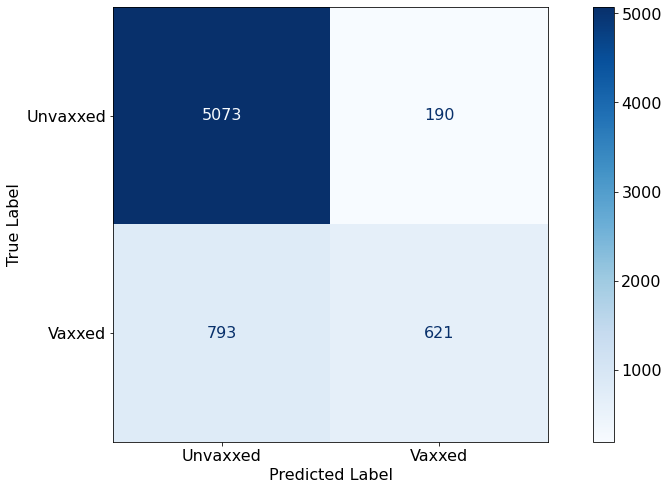

In [12]:
# a more complex model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)
print("Random Forest Classifier Model\n")
dp.scores2(X_train, y_train, X_test, y_test, rfc)
viz.plot_cm(X_train, y_train, X_test, y_test, rfc)

## Final Model - Hyperparameter Tuning
Using random forest, hyperparameters are tuned. Random forest is chosen for this process due to higher scores than scores from decision tree. This analysis focuses on the **recall score** on 0's (unvaccinated respondents) as we want to predict unvaccinated respondents as much as possible. The recall score for 0's shown below is slightly higher while the accuracy stays the same.

Please refer to **code/DEA_RFC_hyperparameter_tuning.ipyng** for detailed steps on hyperparameter tuning.

Random Forest Classifier Model with
Hyperparameter Tuned

CV score:     85.02%
X-test score: 85.20%
RMSE:         0.3847

X-test score

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5263
           1       0.78      0.42      0.55      1414

    accuracy                           0.85      6677
   macro avg       0.82      0.69      0.73      6677
weighted avg       0.84      0.85      0.83      6677



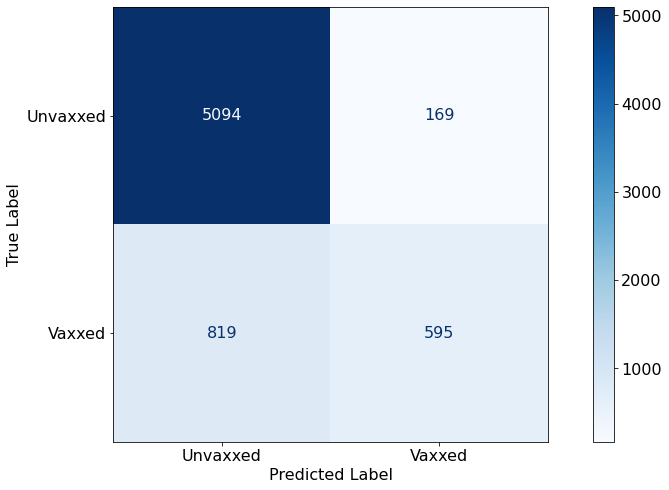

In [13]:
# a more complex modell with hyperparameter tuned
# This is the final model.
rfc_hpt = RandomForestClassifier(random_state=1,
                                 criterion = 'entropy',
                                 max_features = 'auto',
                                 max_depth = 15,
                                 min_samples_leaf = 1,
                                 min_samples_split=4,
                                 n_estimators = 982
                                )

print("Random Forest Classifier Model with\nHyperparameter Tuned\n")
dp.scores2(X_train, y_train, X_test, y_test, rfc_hpt)
viz.plot_cm(X_train, y_train, X_test, y_test, rfc_hpt)

## Feature Importance
Below shows a bar chart showing the top 20 dummy variables that have the most impact on the analysis.

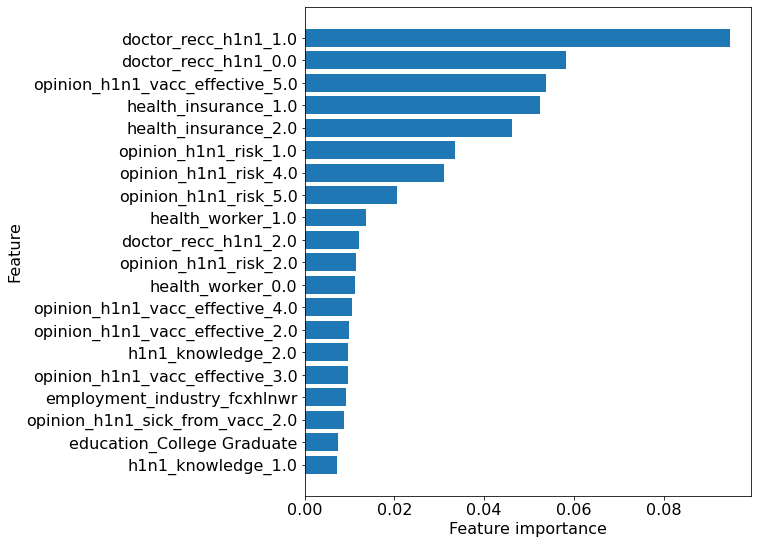

In [14]:
# extract feature importance scores and feature names
# then merge them
feat_impt = pd.concat([pd.DataFrame(rfc_hpt.feature_importances_, columns = ['FI_score']),
                       pd.DataFrame(X_train.columns.values, columns = ['Features'])],
                      axis = 1)

# sort descending by importance
feat_impt.sort_values(by = 'FI_score', inplace=True)

# print graph of the top 20 important features
plt.figure(figsize=(8,9))
plt.barh(range(20), feat_impt.FI_score[-20:], align='center') 
plt.yticks(np.arange(20), feat_impt.Features[-20:]) 
plt.xlabel('Feature importance')
plt.ylabel('Feature');

# Result
With a 97% recall rate for unvaccinated people and 85% accuracy, this model is reliable to predict if one is unvaccinated.

## Visualization
Some key dummy variables are selected for the visualization for a better understanding.

The unvaccination rate means a rate of people who did not get vaccinated.

- **The overall vaccination rate is 21% meaning 79% of respondents are not vaccinated.**

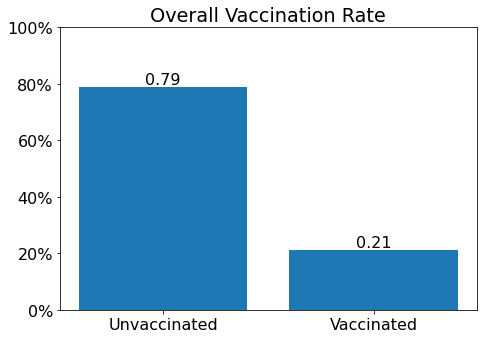

In [15]:
data = y.value_counts(normalize=True)
title = "Overall Vaccination Rate"

viz.result(data, title)

- **People who did not respond to the question asking if one had a doctor's recommendation have the highest unvaccination rate.**

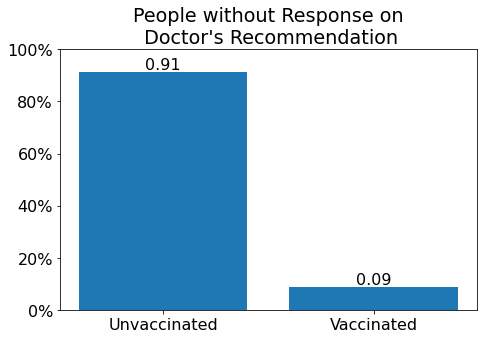

In [16]:
doctor_recommendation = pd.concat([y, X['doctor_recc_h1n1_2.0']], axis = 1)
not_recommended = doctor_recommendation.h1n1_vaccine.loc[doctor_recommendation['doctor_recc_h1n1_2.0'] == 1]

data = not_recommended.value_counts(normalize = True)
title = "People without Response on\n Doctor's Recommendation"

viz.result(data, title)

- **Unvacinnated people without doctor's recommendation tend to be somewhat concerned.**

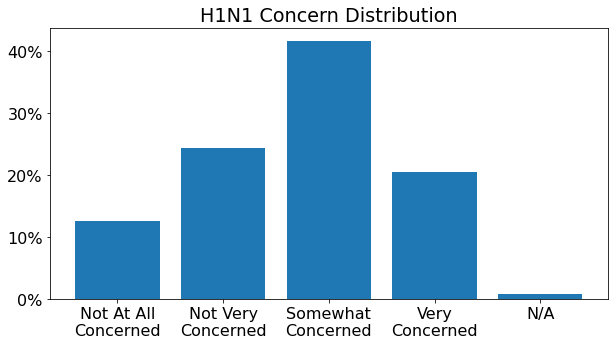

In [17]:
# Distribution of H1N1 Vaccine Concern from people with no vaccine and no response to doctor's recommendation
not_recommend_2 = all_data.h1n1_concern.loc[(all_data['doctor_recc_h1n1'] == 2) 
                                            & (all_data['h1n1_vaccine'] == 0)]

count = not_recommend_2.value_counts(normalize = True)
value = [i for i in count.sort_index()]
index = [i for i in count.sort_index().index]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(index, value)
ax.set_title("H1N1 Concern Distribution")
ax.yaxis.set_major_formatter('{x:.0%}')
plt.xticks(np.arange(5), ['Not At All\nConcerned', 'Not Very\nConcerned', 'Somewhat\nConcerned', 'Very\nConcerned', 'N/A']) 
plt.show()

- **Anyone who did not answer a scale 5 (very effective) on the opinion of the H1N1 vaccine has a high unvaccination rate.**

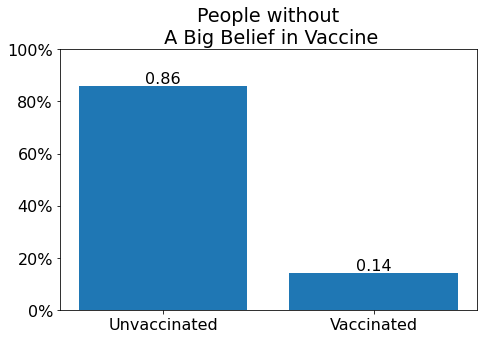

In [18]:
opinion_vac_eff = pd.concat([y, X['opinion_h1n1_vacc_effective_5.0']], axis = 1)
opinion_vac_eff_not_5 = opinion_vac_eff.h1n1_vaccine.loc[opinion_vac_eff['opinion_h1n1_vacc_effective_5.0'] == 0]

data = opinion_vac_eff_not_5.value_counts(normalize = True)
title = "People without\n A Big Belief in Vaccine"

viz.result(data, title)

- **Unvacinnated people without a big belief tend to be somewhat concerned.**

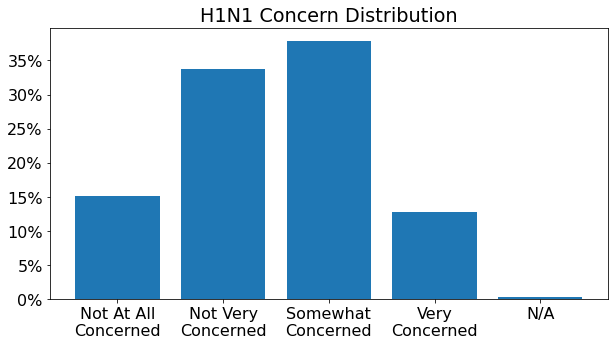

In [19]:
# Distribution of H1N1 Vaccine Concern from people with no vaccine and no strong belief in the vaccine

opinion_not_5 = all_data.h1n1_concern.loc[(all_data['opinion_h1n1_vacc_effective'] != 5) 
                                            & (all_data['h1n1_vaccine'] == 0)]

count = opinion_not_5.value_counts(normalize = True)
value = [i for i in count.sort_index()]
index = [i for i in count.sort_index().index]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(index, value)
ax.set_title("H1N1 Concern Distribution")
ax.yaxis.set_major_formatter('{x:.0%}')
plt.xticks(np.arange(5), ['Not At All\nConcerned', 'Not Very\nConcerned', 'Somewhat\nConcerned', 'Very\nConcerned', 'N/A']) 
plt.show()

- **Anyone without health insurance has a high unvaccination rate.** This category does not include people who do not know if they have health insurance or not.

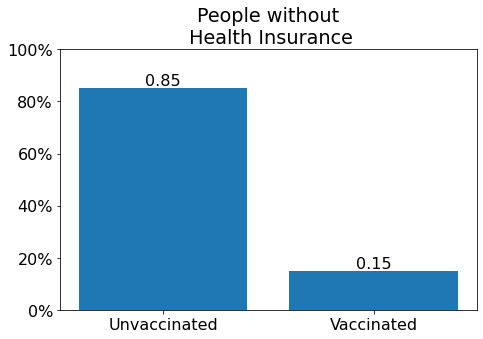

In [20]:
insurance = pd.concat([y, X['health_insurance_0.0']], axis = 1)
no_insurance = insurance.h1n1_vaccine.loc[insurance['health_insurance_0.0'] == 1]

data = no_insurance.value_counts(normalize = True)
title = "People without\n Health Insurance"

viz.result(data, title)

- **Most of unvaccinated people without health insurance did not receive doctor's recommendation.**

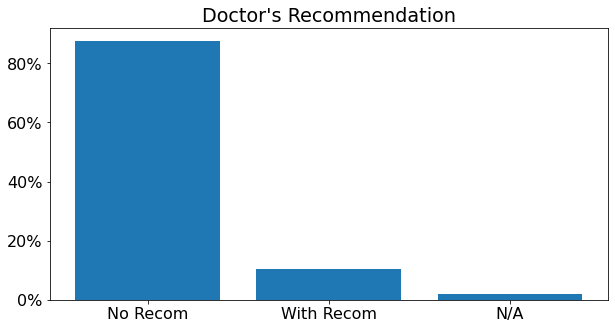

In [21]:
# Graph of doctor's recommendation from people with no vaccine and no health insurance

opinion_not_5 = all_data.doctor_recc_h1n1.loc[(all_data['health_insurance'] == 0) 
                                            & (all_data['h1n1_vaccine'] == 0)]

count = opinion_not_5.value_counts(normalize = True)
value = [i for i in count.sort_index()]
index = [i for i in count.sort_index().index]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(index, value)
ax.set_title("Doctor's Recommendation")
ax.yaxis.set_major_formatter('{x:.0%}')
plt.xticks(np.arange(3), ['No Recom', 'With Recom', 'N/A']) 
plt.show()

# Conclusions
- **People without a response to a doctor's recommendation question have the lowest vaccination rate.** 
- **People without health insurance tend not to get vaccinated.**
- Using the above two statements, we can see that people who do not pay much attention to their medical status tend not to get vaccinated.
- **People who do not strongly believe in the H1N1 vaccine tend not to get vaccinated.** It is important to find a way to let people know that the H1N1 vaccine is safe and effective.
- Based on h1n1 concern graphs, people are generally concerned about getting the flu regardless of response to the questions.
- It seems demographics (gender, race, region, etc) have a lower impact on the analysis.

### Next Steps
Further analysis could help the government gain more insight into understanding people without vaccination.

- **Pruning some features.** The survey already has more than 30 questions. We can try to narrow it down to around 10 or more specific features the government is interested in.
- **Select demographics for the analysis.** The results do not have much information on demographics. Run the analysis again using only demographics.
- **More research on missing values.** Most of the missing values are marked as "unknown" or "N/A". Per request, the missing values can be assigned with one of the available options in each question.